In [1]:
library(stats)
library(ggplot2)
library(lsa)
library(tidyverse)

Loading required package: SnowballC

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.3     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [26]:
df <- read.csv('data/wdms/WDMAll.csv',row.names=1)
wdm <- apply(as.matrix(df[2:ncol(df)]),1,replace_na,0)
head(wdm)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
able,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
accessory,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accurate,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
add,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
added,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
additional,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
cosdist <- function(wdm){as.dist(apply(10**(1-cosine(wdm)),1,replace_na,10))}
dist1 <- cosdist(wdm)
dist2 <- dist(wdm)

                  able accessory  accurate       add     added additional
accessory     2.828427                                                   
accurate      2.236068  2.645751                                         
add           2.449490  2.828427  2.645751                               
added         2.236068  2.645751  2.000000  2.236068                     
additional    2.449490  2.449490  2.236068  2.449490  1.732051           
ago           2.645751  2.645751  2.449490  2.236068  2.449490   1.732051
allow         2.000000  2.449490  1.000000  2.449490  1.732051   2.000000
amazing       2.449490  2.449490  1.732051  2.449490  1.732051   1.414214
amazon        2.645751  2.236068  2.449490  2.236068  2.000000   2.236068
archer        2.828427  2.828427  2.236068  2.828427  2.236068   2.828427
archery       5.099020  5.830952  4.795832  5.656854  4.795832   5.656854
arm           2.449490  3.162278  3.000000  2.828427  2.645751   2.828427
arrow        15.427249 15.556349 15.71

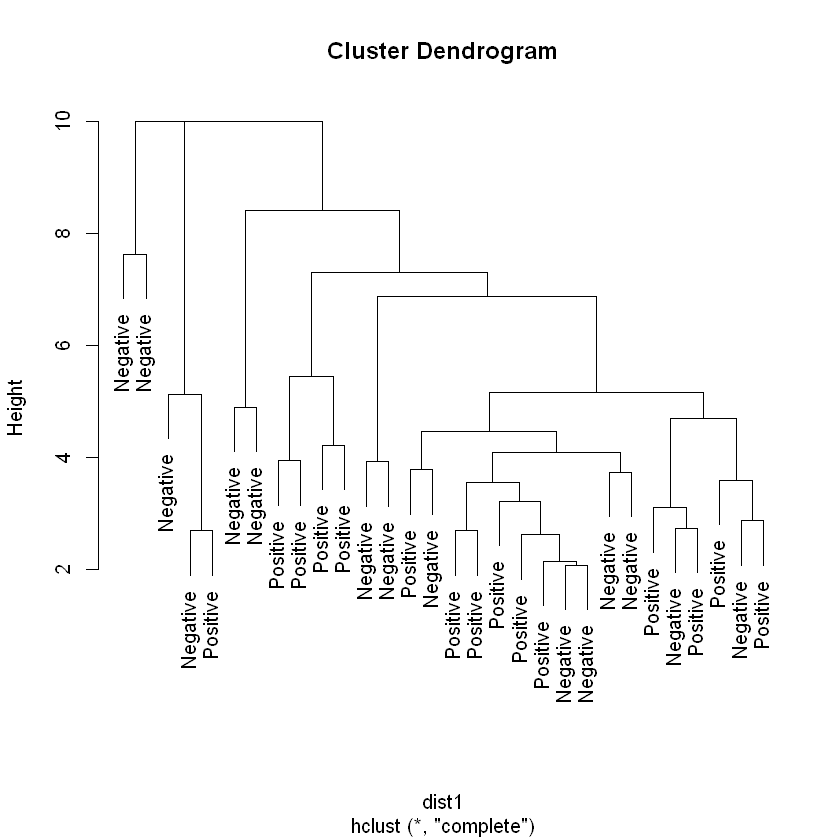

In [34]:
clust1 <- hclust(dist1)
plot(clust1,labels=df$LABEL)

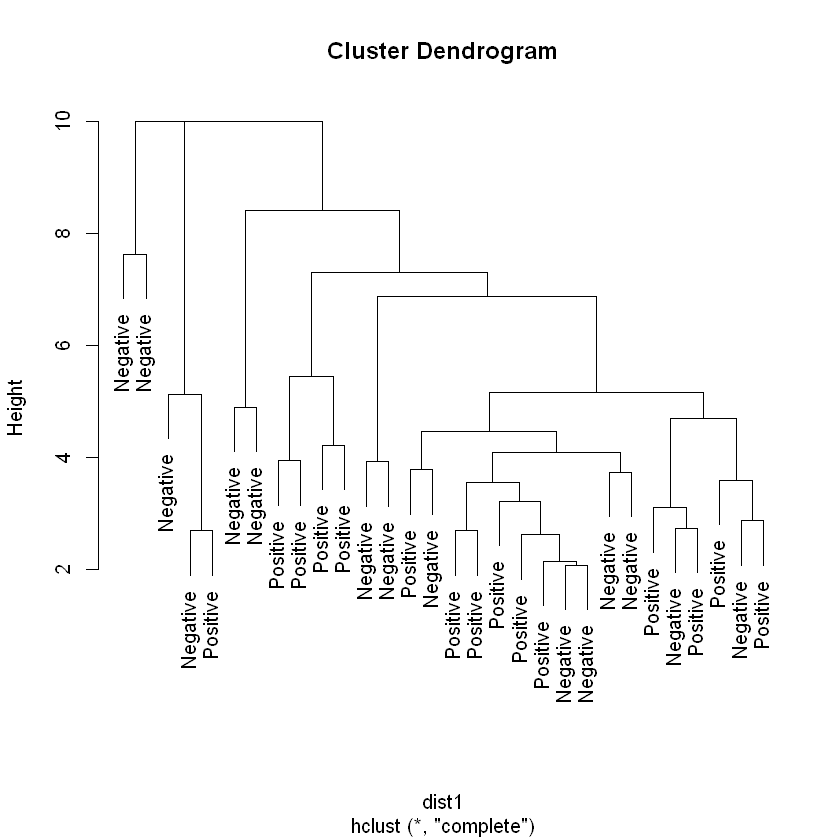

In [39]:
clust2 <- hclust(dist(wdm))
plot(clust1,labels=df$LABEL)